# 1. Fraud: A How-To Guide
In this problem you will use density modeling to try and ensure that there are no statistical irregularities in data that you have generated yourself.

1. Download the following data containing personal transactions over a period of several years.
2. Now build a density model for the number of transactions that occur in a single month.
3. Create plots showing the distribution that you've created.
4. Draw 10 samples from this density model using scikit.learn.

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from sklearn.neighbors.kde import KernelDensity
from sklearn.mixture import GaussianMixture
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("/Users/oscarengelbrektson/Documents/Minerva/CS156 - ML/anonymized.csv")
data.head()

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36


### Pre-processing data.Date

In [7]:
data['Month'] = np.array([x[2:5] for x in data.Date.values])

In [8]:
#Turn date into ordinal value
#data.Date = [pd.to_datetime(data.Date[i]).toordinal() for i in range(len(data.Date))]
data.head()

,Date,Amount,Month
0,25May2016,54241.35,May
1,29May2017,54008.83,May
2,30Jun2017,54008.82,Jun
3,05Jan2017,52704.37,Jan
4,23Feb2017,52704.36,Feb


In [12]:
X = data.groupby('Month').count()['Amount'].values.reshape(-1,1)
mean=np.mean(X)
std=np.std(X)

x_plot = np.linspace(mean-3*std,mean+3*std,100)

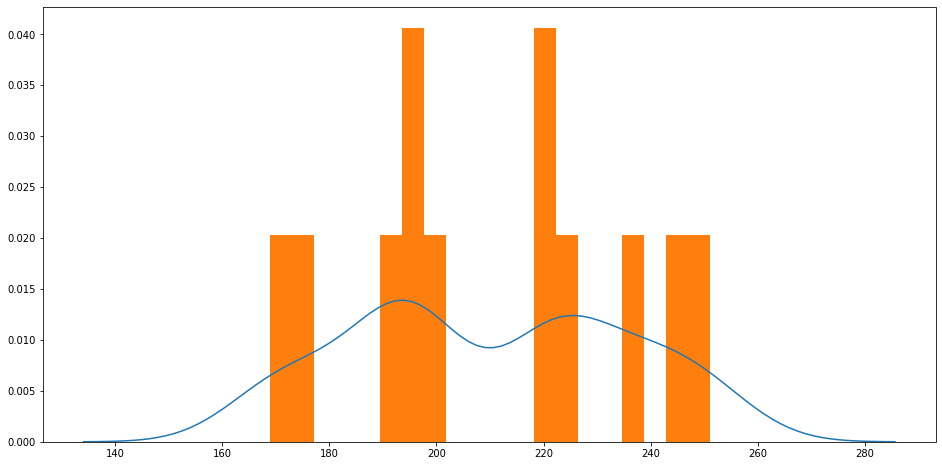

In [23]:
plt.figure(figsize=(16,8))
kde = KernelDensity(kernel='gaussian', bandwidth=10).fit(X)
log_dens = kde.score_samples(x_plot.reshape(-1,1))
plt.plot(x_plot, np.exp(log_dens), '-', label="kernel = 'Gaussian'")
plt.hist(X,bins=20,density=1)
plt.show()

(-6000, 0)

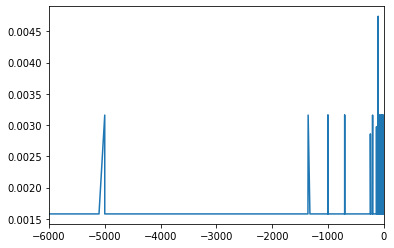

In [80]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(data)
log_dens = kde.score_samples(data)
plt.plot(data["Amount"], np.exp(log_dens))
plt.xlim(-6000, 0)

In [60]:
GaussianMixture(n_components=1)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

(array([2., 0., 1., 3., 0., 0., 3., 0., 1., 2.]),
 array([169. , 177.2, 185.4, 193.6, 201.8, 210. , 218.2, 226.4, 234.6,
        242.8, 251. ]),
 <a list of 10 Patch objects>)

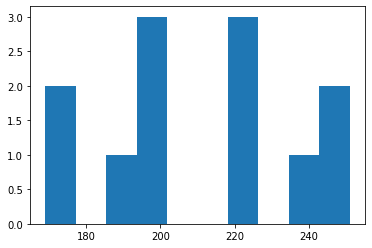

In [20]:
plt.hist(X)

# 2. Clustering Survey Data
In this problem you will use expectation maximization (EM) on survey data. For the statistical model that we wish to fit, we will assume that everyone comes from one of four clusters.

1. Download the following Python script which generates (synthetic) responses to a binary questionnaire.
2. Use the script to generate an example dataset.
3. Download the following Python script which you will have to edit and finish so that it can infer which person belonged to which cluster. In particular you will need to:
    1. Estimate the probability of a person belonging to a particular cluster.
    2. Estimate the maximum likelihood parameters for the biases. This is the probability that a person from a particular cluster will answer true to a particular question.